In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

%matplotlib inline

In [3]:
# Load the data
df = pd.read_csv('churn.all2')

In [4]:
# Check the data, first 5 rows
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
# Check the data types and missing values
# total_intl_charge 1 missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

In [6]:
df.isna().any()
# total_intl_charge NaN values

state                            False
account_length                   False
area_code                        False
phone_number                     False
intl_plan                        False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                 True
number_customer_service_calls    False
churned                          False
dtype: bool

In [7]:
df.describe(include=['O'])

,state,phone_number,intl_plan,voice_mail_plan,total_eve_charge,churned
count,5000,5000,5000,5000,5000,5000
unique,51,5000,2,2,1660,2
top,WV,382-4657,no,no,15.9,False.
freq,158,1,4527,3677,15,4293


In [8]:
# check churned column
df['churned'].unique()

array([' False.', ' True.'], dtype=object)

In [9]:
# convert churned column to 0 and 1
df['churned']=df['churned'].replace(' False.', '0', regex=True).astype(object)
df['churned']=df['churned'].replace(' True.', '1', regex=True).astype(object)

In [10]:
# convert churned to numeric values
df['churned'] = df['churned'].astype(int)

In [11]:
# convert total_intl_charge to numeric values
df['total_intl_charge'] = df['total_intl_charge'].astype(float)

In [12]:
# there are 1 missing value in the 'total_intl_charge' column
# replace with mean value
# df.total_intl_charge.isnull().sum()
df['total_intl_charge'] = df['total_intl_charge'].fillna(df['total_intl_charge'].mean())



In [13]:
# ? values in total_eve_charge
df['total_eve_charge'].unique()

array(['16.78', '?', '10.3', ..., '25.7', '23.85', '28.93'], dtype=object)

In [14]:
# df['total_eve_charge'] is object type and has ? values in it 
# replace ? values NaN 
df['total_eve_charge'] = df['total_eve_charge'].replace('?',np.NaN)

In [15]:
# df['total_eve_charge'] convert to numeric values
df['total_eve_charge'] = df['total_eve_charge'].astype(float)
# change null values with mean value
df['total_eve_charge'] = df['total_eve_charge'].fillna(df['total_eve_charge'].mean())

In [16]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [17]:
# describe the data
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.052324,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400,0.141400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.295707,50.527789,19.958686,2.273763,2.761396,2.456788,0.745505,1.306363,0.348469
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.892500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [18]:
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['intl_plan'] = label_encoder.fit_transform(df['intl_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df['churned'] = label_encoder.fit_transform(df['churned'])

# drop phone number column, we dont need it
df.drop(['phone_number'], axis = 1, inplace=True)

<AxesSubplot:xlabel='churned', ylabel='count'>

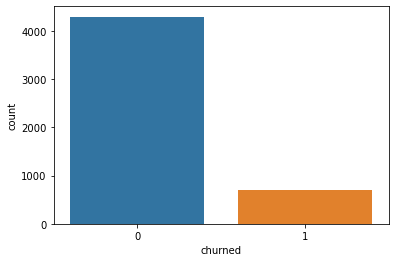

In [19]:
# display the balance of (churn) with a count plot
sns.countplot(x='churned', data=df)

In [20]:
# total number of customers
df['churned'].value_counts()


0    4293
1     707
Name: churned, dtype: int64

In [21]:
# percent of customers who churned
df['churned'].value_counts(normalize=True) * 100

0    85.86
1    14.14
Name: churned, dtype: float64

<AxesSubplot:xlabel='account_length', ylabel='count'>

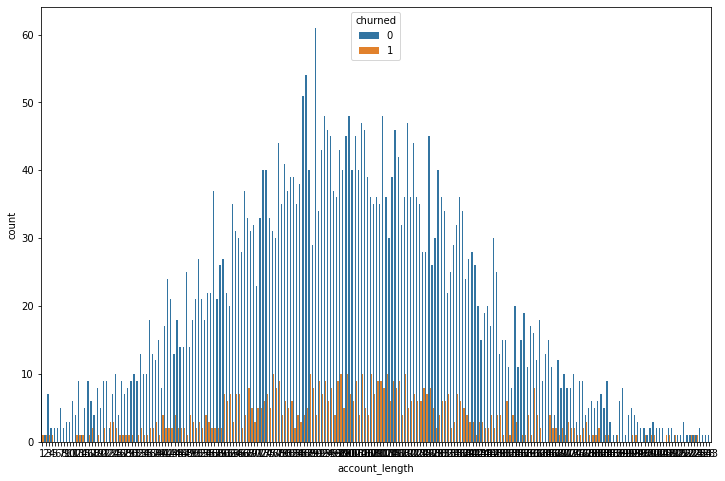

In [22]:
# graph of account length of customers who churned and not churned
fig = plt.figure(figsize=(12,8))
sns.countplot(x='account_length', hue='churned', data=df)


<AxesSubplot:xlabel='area_code', ylabel='count'>

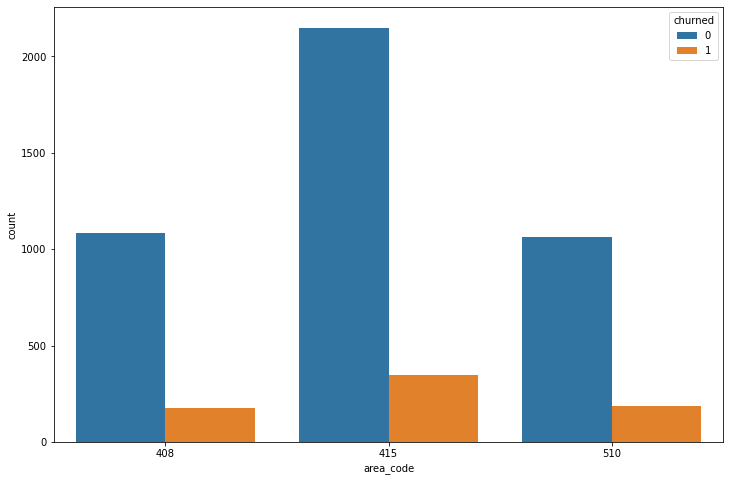

In [23]:
# area code of customers who churned and not churned
fig = plt.figure(figsize=(12,8))
sns.countplot(x='area_code', hue='churned', data=df)


In [24]:
# percentage of customers who churned for area codes with 2 decimal places

print('Area code 408: %{}'.format(round(df[(df['area_code'] == 408) & (df['churned'] == 1)].shape[0] / df[(df['area_code'] == 408)].shape[0] * 100, 2)))
print('Area code 415: %{}'.format(round(df[(df['area_code'] == 415) & (df['churned'] == 1)].shape[0] / df[(df['area_code'] == 415)].shape[0] * 100, 2)))
print('Area code 510: %{}'.format(round(df[(df['area_code'] == 510) & (df['churned'] == 1)].shape[0] / df[(df['area_code'] == 510)].shape[0] * 100, 2)))

# there are no sign about area codes

Area code 408: %14.06
Area code 415: %13.87
Area code 510: %14.77


<AxesSubplot:xlabel='number_customer_service_calls', ylabel='count'>

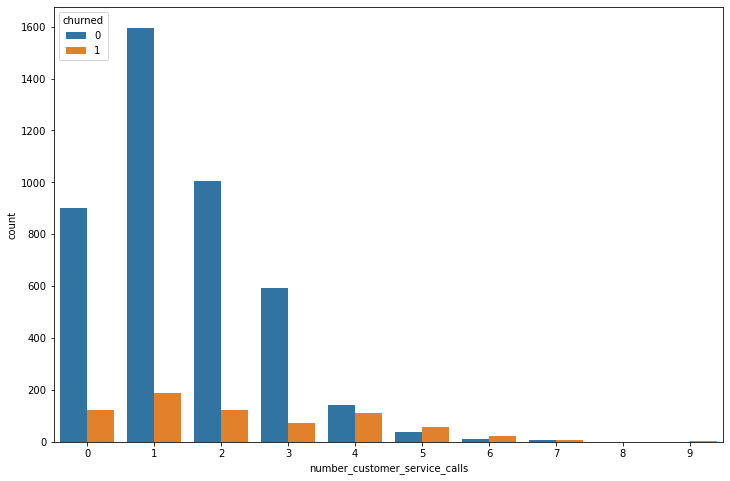

In [25]:
# comparing number of services call customers who churned and not churned
fig = plt.figure(figsize=(12,8))
sns.countplot(x='number_customer_service_calls', hue='churned', data=df)

<AxesSubplot:xlabel='churned', ylabel='number_customer_service_calls'>

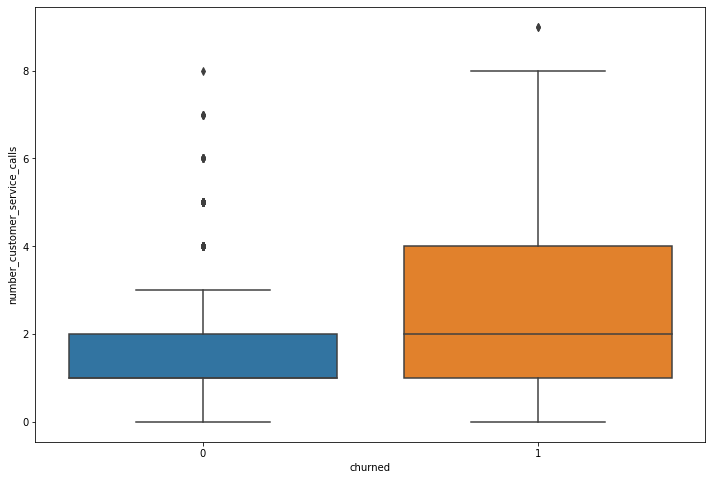

In [26]:
# boxplot for number of customer service calls
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='churned', y='number_customer_service_calls', data=df)

In [27]:
# customers who call customer service 4 or more times and churned
print('4 or more times customer service call and churned: %{}'.format(round(df[(df['number_customer_service_calls'] >= 4) & (df['churned'] == 1)].shape[0] / df[(df['number_customer_service_calls'] >= 4)].shape[0] * 100, 2)))
# customers who call customer service less than 4 times and churned
print('Less than 4 times customer service call and churned: %{}'.format(round(df[(df['number_customer_service_calls'] < 4) & (df['churned'] == 1)].shape[0] / df[(df['number_customer_service_calls'] < 4)].shape[0] * 100, 2)))

# There is a very distinct difference. 
# Those who call customer service and their problems are not solved are highly churned.


4 or more times customer service call and churned: %50.38
Less than 4 times customer service call and churned: %11.0


In [28]:
pd.crosstab(df['churned'], df['intl_plan'], margins = True, normalize = True)

intl_plan,0,1,All
churned,,,
0,0.8038,0.0548,0.8586
1,0.1016,0.0398,0.1414
All,0.9054,0.0946,1.0000


<AxesSubplot:xlabel='intl_plan', ylabel='count'>

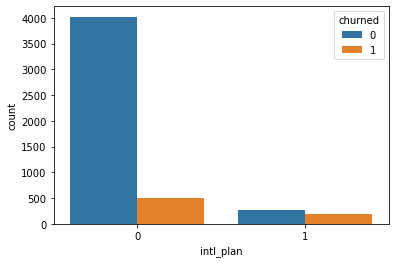

In [29]:
sns.countplot(x='intl_plan', hue='churned', data=df)

<AxesSubplot:xlabel='state', ylabel='count'>

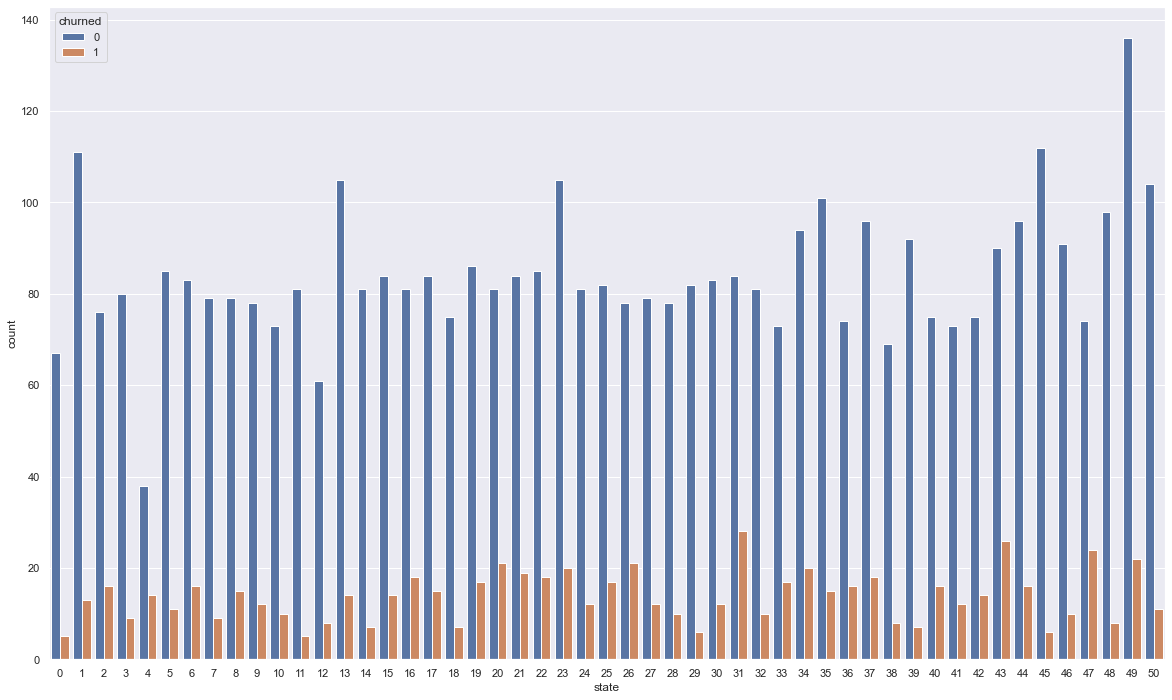

In [30]:
# churn by state
sns.set(rc={'figure.figsize':(20,12)}) 
sns.countplot(x='state', hue='churned', data=df)


Text(0.5, 0, 'States')

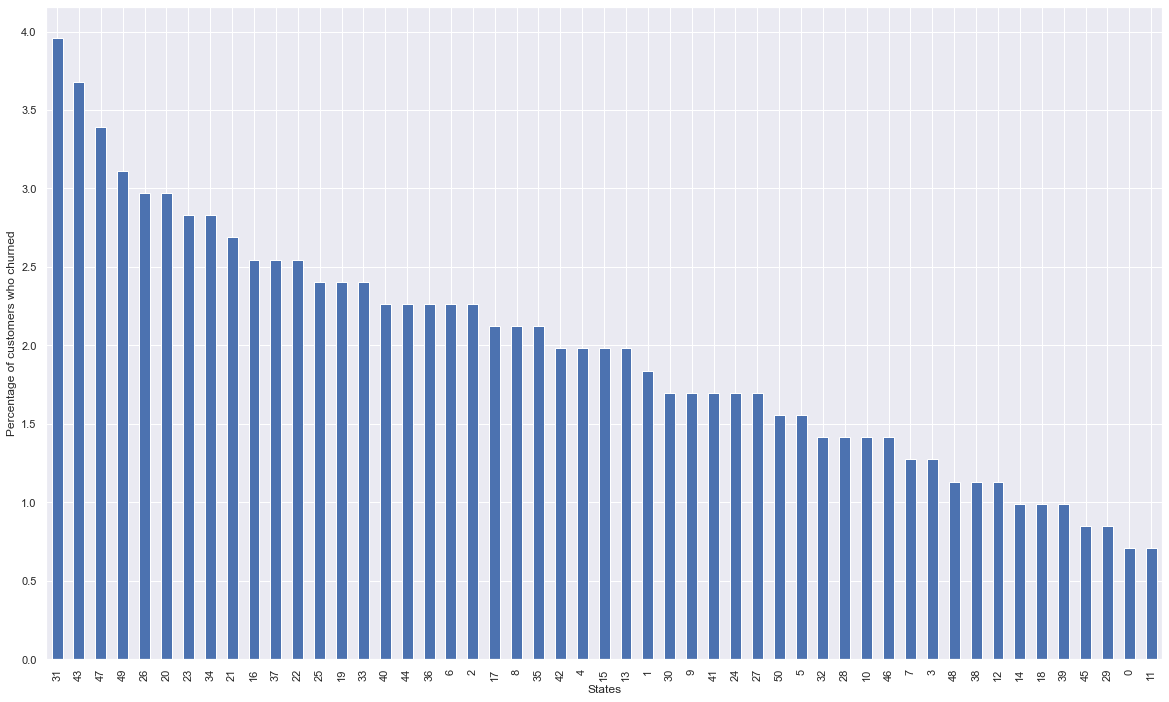

In [31]:
# percentage of customers who churned with states
#df[df['churned'] == 'True.']['state'].value_counts(normalize=True) * 100
# show histogram for percentage of customers who churned with states
(df[df['churned'] == 1]['state'].value_counts(normalize=True)*100).plot(kind='bar')
# y-axis label
plt.ylabel('Percentage of customers who churned')
# x-axis label
plt.xlabel('States')
                

<AxesSubplot:>

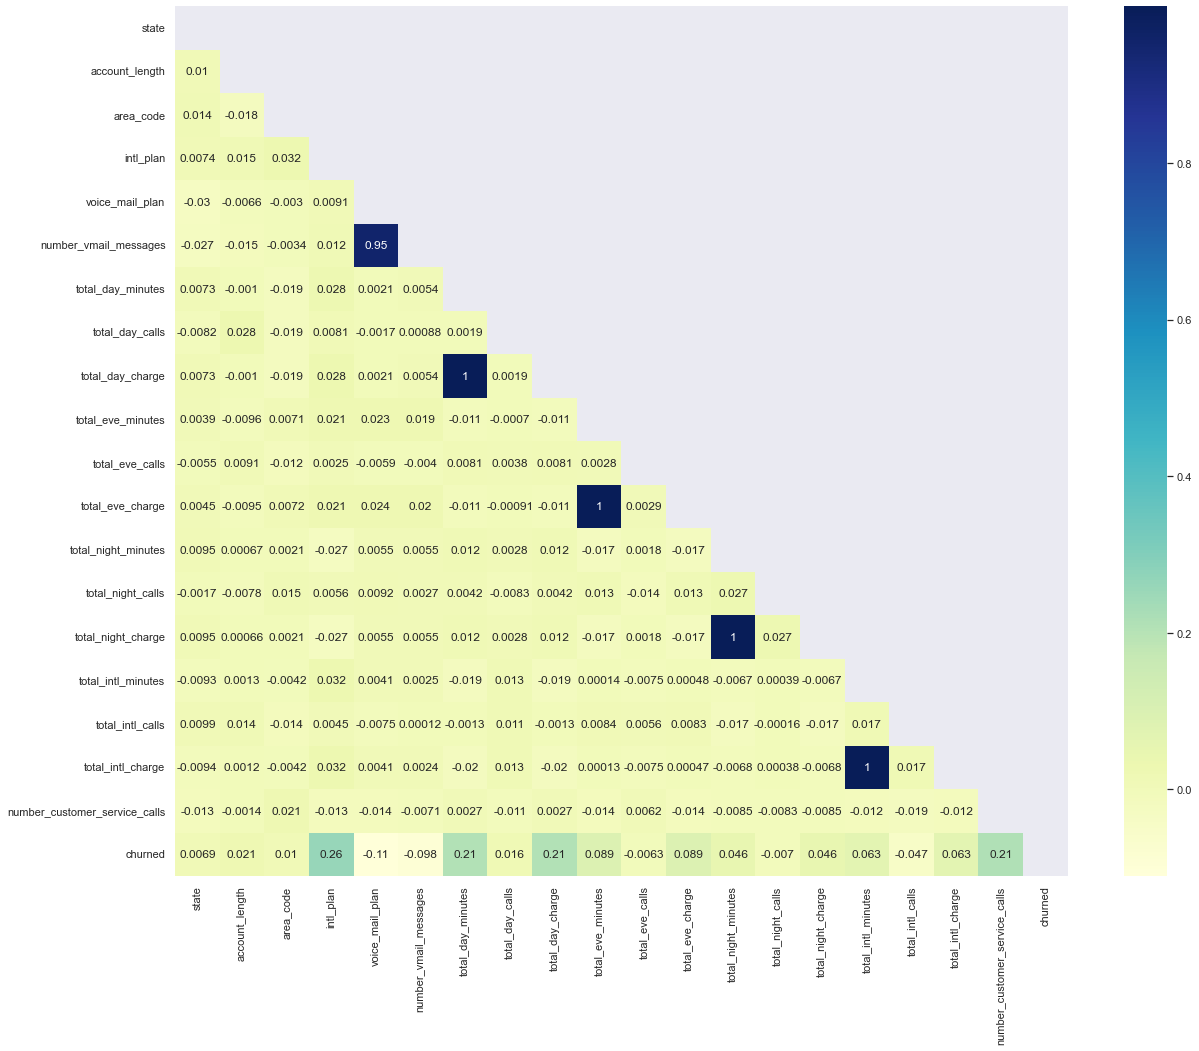

In [32]:
# correlation matrix
corr = df.corr()
# get the upper triangle of the correlation matrix for masking
matrix = np.triu(corr)
# plot the heatmap
fig = plt.figure(figsize=(20,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, mask=matrix, cmap="YlGnBu")

# strong correlation between:
# charge and minutes (as expected)
# voice mail plan with voice mail messages (as expected)


In [37]:
# we will normalize our data so the prediction on all features will be at the same scale
X = df.iloc[:,0:19].values
y = df.iloc[:,19].values
# normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:19])
# # add non-feature target column to dataframe
dfNorm['churned'] = df['churned']
# dfNorm.head(10)

X = dfNorm.iloc[:,0:19].values
y = dfNorm.iloc[:,19].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((3500, 19), (3500,), (1500, 19), (1500,))

In [39]:
# Split train and test
X = df.loc[:, df.columns != 'churned']
y = df['churned']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.30, random_state = 1)


Accuracy: 0.95
Confusion matrix:
[[1273   11]
 [  63  153]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1284
           1       0.93      0.71      0.81       216

    accuracy                           0.95      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.95      0.95      0.95      1500



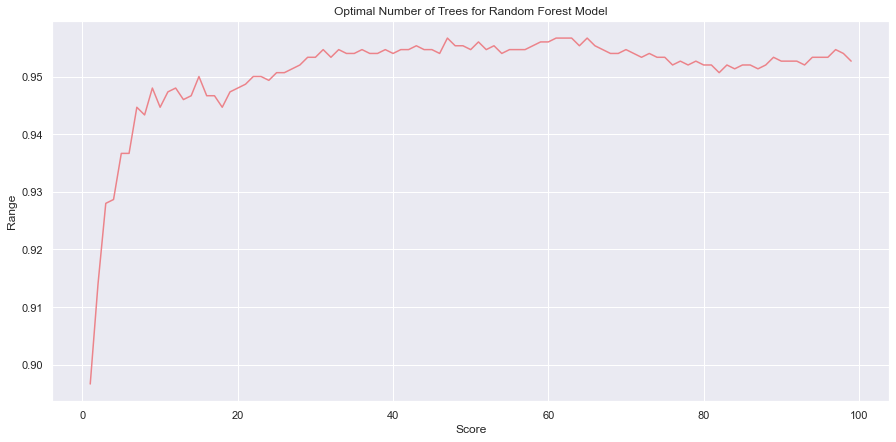

In [40]:
# random forest classifier model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
# predict the test set results
y_pred = rf.predict(X_test)
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print the accuracy, confusion matrix and classification report
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

# plt 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range')
plt.xlabel('Score')
plt.title('Optimal Number of Trees for Random Forest Model')
# plt.xticks(rotation=0, horizontalalignment="center")
# plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [41]:
# KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# predict the test set results
y_pred = knn.predict(X_test)
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print the accuracy, confusion matrix and classification report
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))





Accuracy: 0.88
Confusion matrix:
[[1259   25]
 [ 162   54]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1284
           1       0.68      0.25      0.37       216

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.85      1500



In [42]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# predict the test set results
y_pred = logreg.predict(X_test)
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print the accuracy, confusion matrix and classification report
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Confusion matrix:
[[1268   16]
 [ 203   13]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1284
           1       0.45      0.06      0.11       216

    accuracy                           0.85      1500
   macro avg       0.66      0.52      0.51      1500
weighted avg       0.80      0.85      0.80      1500



/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# best parameters for logistic regression model
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logreg, parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
print('Best parameters found:')
print(grid_search.best_params_)
print('Best score found:')
print(grid_search.best_score_)

# Best parameters found:
# {'C': 1, 'penalty': 'l2'}
# Best score found:
# 0.8625714285714284

/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ov

Best parameters found:
{'C': 1, 'penalty': 'l2'}
Best score found:
0.8625714285714284


/Users/overflow/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# best parameters for KNN model
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
grid_search = GridSearchCV(knn, parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
print('Best parameters found:')
print(grid_search.best_params_)
print('Best score found:')
print(grid_search.best_score_)


Best parameters found:
{'n_neighbors': 13}
Best score found:
0.8857142857142858


In [44]:
# best parameters for random forest model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] , 'max_features': [2, 4, 6, 8]}
grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
print('Best parameters found:')
print(grid_search.best_params_)
print('Best score found:')
print(grid_search.best_score_)


Best parameters found:
{'max_features': 8, 'n_estimators': 80}
Best score found:
0.9594285714285714


In [ ]:
# for optimized models
# 1st model is random forest model - score 0.95
# 2nd model is KNN model - score 0.88
# 3rd model is logistic regression model - score 0.86